In [3]:
%%time
# Ignore this block -- it's for the documentation build
try:
    import os, sys
    sys.path.insert(1, os.path.abspath('/home/runner/work/psi4/psi4/code/objdir/stage//usr/local/psi4/lib/'))
except ImportError:
    pass

# This is the important part
import psi4
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

CPU times: user 269 ms, sys: 176 ms, total: 445 ms
Wall time: 5.45 s


In [4]:
%%time
psi4.set_output_file('output.dat', False)

CPU times: user 1.05 ms, sys: 0 ns, total: 1.05 ms
Wall time: 3.08 ms


PosixPath('output.dat')

In [5]:
%%time

#! Sample HF/cc-pVDZ H2O Computation

psi4.set_memory('500 MB')

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.energy('scf/cc-pvdz')

CPU times: user 298 ms, sys: 22.4 ms, total: 320 ms
Wall time: 523 ms


-76.0266327350902

In [6]:
%%time

#! Sample UHF/6-31G** CH2 Computation

R = 1.075
A = 133.93

ch2 = psi4.geometry("""
0 3
C
H 1 {0}
H 1 {0} 2 {1}
""".format(R, A)
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')

CPU times: user 276 ms, sys: 5.37 ms, total: 282 ms
Wall time: 294 ms


-38.92533462893707

In [7]:
%%time
psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)


Optimizer: Optimization complete!
CPU times: user 821 ms, sys: 38.3 ms, total: 860 ms
Wall time: 962 ms


-76.02703272937481

In [8]:
%%time
scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)

CPU times: user 973 ms, sys: 41.8 ms, total: 1.01 s
Wall time: 1.05 s


In [9]:
%%time

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")

CPU times: user 929 µs, sys: 0 ns, total: 929 µs
Wall time: 939 µs


In [10]:
%%time

psi4.set_options({'scf_type': 'df',
                  'freeze_core': True})

psi4.energy('sapt0/jun-cc-pvdz', molecule=dimer)

CPU times: user 3.73 s, sys: 255 ms, total: 3.98 s
Wall time: 4.27 s


-0.0022355823909805178

In [11]:
%%time
#! Example potential energy surface scan and CP-correction for Ne2

ne2_geometry = """
Ne
--
Ne 1 {0}
"""

Rvals = [2.5, 3.0, 4.0]

psi4.set_options({'freeze_core': True})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ne2 = psi4.geometry(ne2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ne2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))              

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            2.5                        0.758605
            3.0                        0.015968
            4.0                        -0.016215
CPU times: user 5.42 s, sys: 1.4 s, total: 6.82 s
Wall time: 10.5 s


In [12]:
%%time
argon_geometry = """
Ar
--
Ar 1 {0}
"""

method = 'ccsd(t)/aug-cc-pvdz'
energies = []

psi4.set_options({'freeze_core': True})
for R in np.arange(3.5, 6.1, 0.1): 
    argon = psi4.geometry(argon_geometry.format(R))
    energy = psi4.energy(method,bsse_type='cp', molecule=argon)
    energies.append((R, energy))
for distance, energy in energies:
    print(f'Distance: {distance:.2f} Angstrom, Energy: {energy:.6f} Hartree')

Distance: 3.50 Angstrom, Energy: 0.000271 Hartree
Distance: 3.60 Angstrom, Energy: 0.000060 Hartree
Distance: 3.70 Angstrom, Energy: -0.000068 Hartree
Distance: 3.80 Angstrom, Energy: -0.000142 Hartree
Distance: 3.90 Angstrom, Energy: -0.000180 Hartree
Distance: 4.00 Angstrom, Energy: -0.000196 Hartree
Distance: 4.10 Angstrom, Energy: -0.000197 Hartree
Distance: 4.20 Angstrom, Energy: -0.000191 Hartree
Distance: 4.30 Angstrom, Energy: -0.000180 Hartree
Distance: 4.40 Angstrom, Energy: -0.000166 Hartree
Distance: 4.50 Angstrom, Energy: -0.000152 Hartree
Distance: 4.60 Angstrom, Energy: -0.000137 Hartree
Distance: 4.70 Angstrom, Energy: -0.000124 Hartree
Distance: 4.80 Angstrom, Energy: -0.000111 Hartree
Distance: 4.90 Angstrom, Energy: -0.000100 Hartree
Distance: 5.00 Angstrom, Energy: -0.000089 Hartree
Distance: 5.10 Angstrom, Energy: -0.000080 Hartree
Distance: 5.20 Angstrom, Energy: -0.000071 Hartree
Distance: 5.30 Angstrom, Energy: -0.000064 Hartree
Distance: 5.40 Angstrom, Energy: 

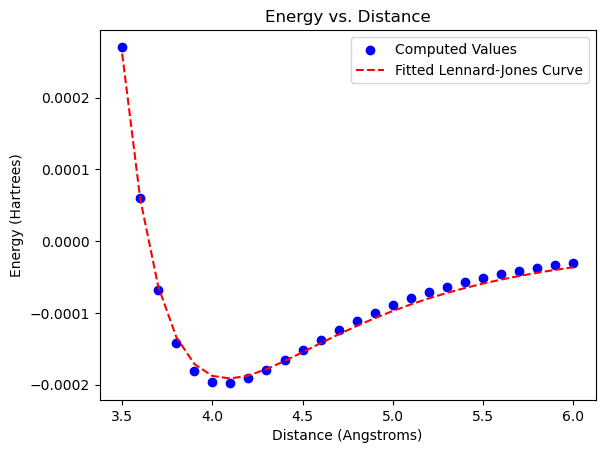

In [13]:
def lennard_jones(r, sigma, eps):
    return 4 * eps * ((sigma/r)**12 - (sigma/r)**6)

# R_values: A list/array of distances between argon atoms (in Angstroms)
# energy_values: A list/array of calculated energies (in Hartrees)
R_values, energy_values = zip(*energies)

# Fit the curve
popt, pcov = curve_fit(lennard_jones, R_values, energy_values)

# popt contains the optimized values for sigma and eps
sigma_opt, eps_opt = popt


fitted_energies = lennard_jones(R_values, sigma_opt, eps_opt)

# Plotting the computed values as dots
plt.scatter(R_values, energy_values, color='blue', label='Computed Values')

# Plotting the fitted curve as a dashed line
plt.plot(R_values, fitted_energies, 'r--', label='Fitted Lennard-Jones Curve')

# Adding title and labels
plt.title('Energy vs. Distance')
plt.xlabel('Distance (Angstroms)')
plt.ylabel('Energy (Hartrees)')
plt.legend()
plt.savefig('argon.png')
plt.show()
